# End-to-end notebook: fisher sampling graphs


In [1]:
# Add model_merging to the python path

import os
import sys

model_merging_base = os.path.abspath("../model_merging/")
# assert it exist
assert os.path.exists(model_merging_base)
if model_merging_base not in sys.path:
    sys.path.append(model_merging_base)

In [3]:
# Imports and cached functions

import os

from llm_weaver import (
    calculate_score_from_weaving_config,
    get_score_from_named_model,
    test_weaver,
)

# Disable parallelism in tokenizers to avoid deadlocks
os.environ["TOKENIZERS_PARALLELISM"] = "false"

2023-11-27 10:24:05.149671: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 10:24:05.183636: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 10:24:05.184196: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 10:24:05.728268: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Define weave config generator


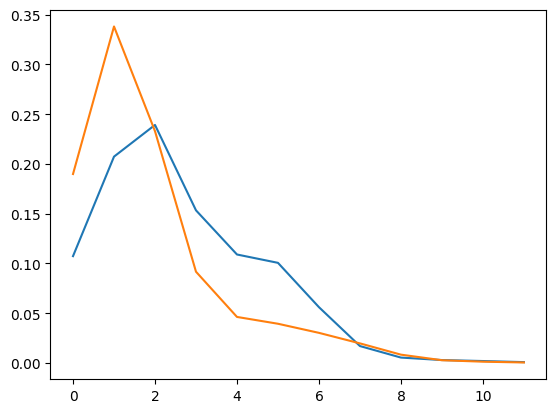

In [10]:
import numpy as np
from llm_weaver import dict_overwrite, get_model_config

from model_merging import hdf5_util, sample_layers

models = [
    {
        "model_id": "textattack/roberta-base-RTE",
        "fishers_path": "../data/fisher_info/rte_fisher.h5",
    },
    {
        "model_id": "textattack/roberta-base-MNLI",
        "fishers_path": "../data/fisher_info/mnli_fisher.h5",
    },
]
fishers = [
    hdf5_util.load_variables_from_hdf5(fisherpath, trainable=False)
    for fisherpath in [model["fishers_path"] for model in models]
]

from model_merging.sample_layers import generate_fisher_distributions

f1, f2 = generate_fisher_distributions(fishers)

# plot f1 and f2 on the same plot
import matplotlib.pyplot as plt

plt.plot(f1, label="f1")
plt.plot(f2, label="f2")

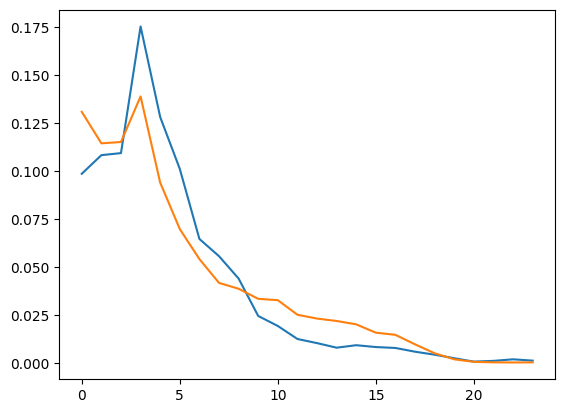

In [11]:
import numpy as np
from llm_weaver import dict_overwrite, get_model_config

from model_merging import hdf5_util, sample_layers

models = [
    {
        "fishers_path": "../data/fisher_info/large_rte_fisher.h5",
    },
    {
        "fishers_path": "../data/fisher_info/large_mnli_fisher.h5",
    },
]
fishers = [
    hdf5_util.load_variables_from_hdf5(fisherpath, trainable=False)
    for fisherpath in [model["fishers_path"] for model in models]
]

from model_merging.sample_layers import generate_fisher_distributions

f1, f2 = generate_fisher_distributions(fishers)

# plot f1 and f2 on the same plot
import matplotlib.pyplot as plt

plt.plot(f1, label="f1")
plt.plot(f2, label="f2")